# <span style ='color:Red'> Tutorial on Regression - Simple , Multiple and Non Linear  </span> 

## <span style ='color:Blue'> *Anil Jadhav , SCIT, Pune* </span>

In [1]:
#Laod all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import numpy as np
%matplotlib inline

In [2]:
#read data by setting region as index column
addata=pd.read_csv("d:/anil/ds & da symbi/business analytics/advertising.csv",index_col=0)#region to be index column

In [4]:
#Understand structure of the data by displaying top 6 rows
print(type(addata))
addata.head(3)

<class 'pandas.core.frame.DataFrame'>


,TV,radio,newspaper,sales
region,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [5]:
#CHeck column names
addata.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
#check data type of each column
addata.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
#Descriptive analytics - five point summary of the data along with mean, standard deviation and count
addata.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#correlation between all pairs
addata.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
#correlation between first three columns only
addata.iloc[:,[0,1,2]].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


c:\Users\Owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


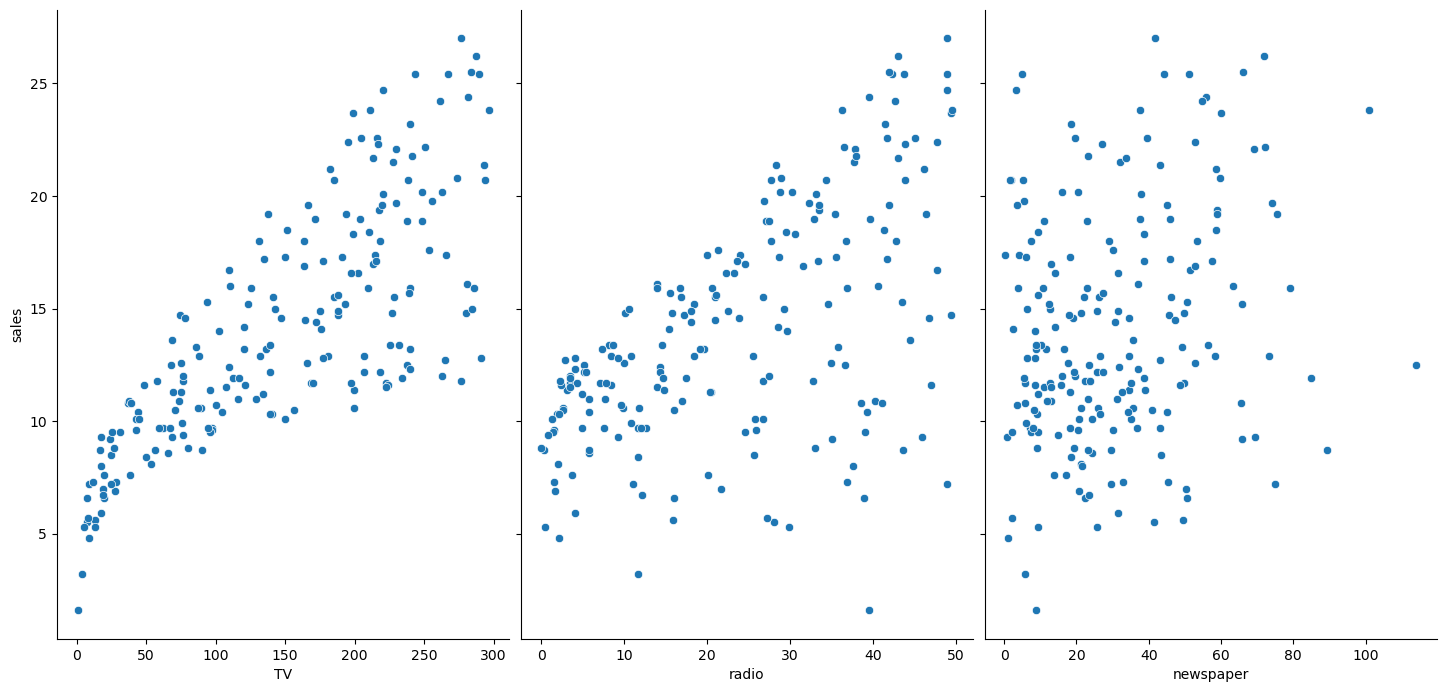

In [8]:
#scatterplot between sales against TV, radio and newspaper advertisement budget
sns.pairplot(addata, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

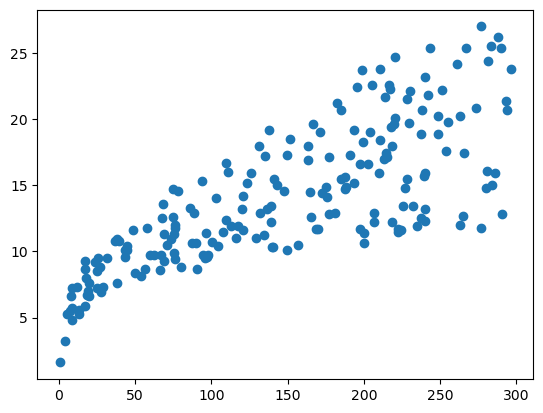

In [10]:
#scatterplot using matplotlib
plt.scatter(addata.iloc[:,0],addata.iloc[:,3])
#plt.scatter(addata.iloc[:,1],addata.iloc[:,3])
#plt.scatter(addata.iloc[:,2],addata.iloc[:,3])

In [9]:
#Linear Regression using stat model formula
model1=smf.ols(formula="sales~TV",data=addata).fit()
#model1.params
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        14:56:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Linear regression using sklearn Linear regression
#Sales as dependent variable and TV budget as independent variable
feature_cols=["TV"]
x=addata[feature_cols]
y=addata.sales
lm1=LinearRegression()
lm1.fit(x,y)
print(lm1.coef_)
print(lm1.intercept_)
print(lm1._residues)

[0.04753664]
7.032593549127693
2102.5305831313517


sales=7.033+(0.048*TV)

In [11]:
print(lm1.score(x,y)) #for sklearn it returns r square value

0.611875050850071


In [12]:
#prediction for new data
x_new=pd.DataFrame({"TV":[50]})
x_new

,TV
0,50


In [13]:
print(model1.predict(x_new))#predict for single new data point using stat model formula
print(lm1.predict(x_new))#predict for single data point using linear regression model

0    9.409426
dtype: float64
[9.40942557]


In [18]:
#Linear regression using sklearn Linear regression
#Sales as dependent variable and TV budget as independent variable
feature_cols=["radio"]
x=addata[feature_cols]
y=addata.sales
lm2=LinearRegression()
lm2.fit(x,y)
print(lm2.coef_)
print(lm2.intercept_)
print(lm2.score(x,y))

[0.20249578]
9.311638095158283
0.33203245544529525


In [19]:
#Linear regression using sklearn Linear regression
#Sales as dependent variable and TV budget as independent variable
feature_cols=["newspaper"]
x=addata[feature_cols]
y=addata.sales
lm3=LinearRegression()
lm3.fit(x,y)
print(lm3.coef_)
print(lm3.intercept_)
print(lm3.score(x,y))

[0.0546931]
12.351407069278162
0.05212044544430516


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


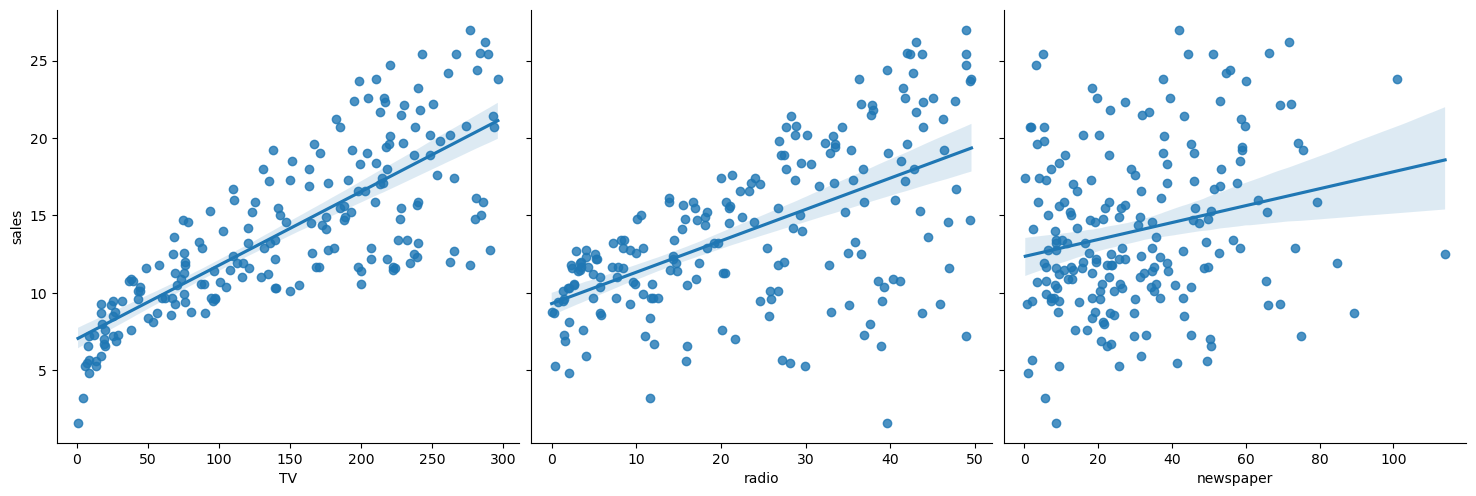

In [20]:
sns.pairplot(addata, x_vars=['TV','radio','newspaper'], y_vars='sales', kind='reg',size=5)

## Multiple Regression

In [28]:
addata=pd.read_csv("d:/anil/ds & da symbi/business analytics/advertising.csv",index_col=0)#region to be index column

In [21]:
#consider all TV radio and newspaper as predictors and sales as dependent variable
lm=LinearRegression()
xdata=addata.iloc[:,[0,1,2]]
ydata=addata.iloc[:,3]
lm.fit(xdata,ydata)

LinearRegression()

In [22]:
print(lm.coef_)
print(lm.intercept_)
print(lm.score(xdata,ydata))

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594085
0.8972106381789522


In [24]:
predictions=lm.predict(xdata)
print(len(predictions))
type(predictions)
predictions[0:10] #prediction for top 10 rows

200


array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872])

In [25]:
import pickle

In [28]:
pickle.dump(lm, open('regmodel.pkl', 'wb'))

In [30]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [34]:
pickled_model.predict(xdata[0:10])

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872])

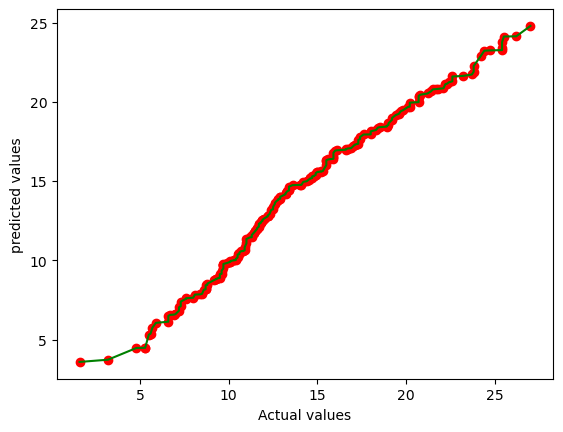

In [32]:
#plt.scatter(addata.iloc[:,4],predictions)
#plt.scatter(np.sort(addata.iloc[:,3]),np.sort(predictions),color="red")
plt.scatter(np.sort(addata.iloc[:,3]),np.sort(predictions),color="red")
plt.plot(np.sort(addata.iloc[:,3]),np.sort(predictions),color="green")
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.show()


<AxesSubplot:xlabel='sales'>

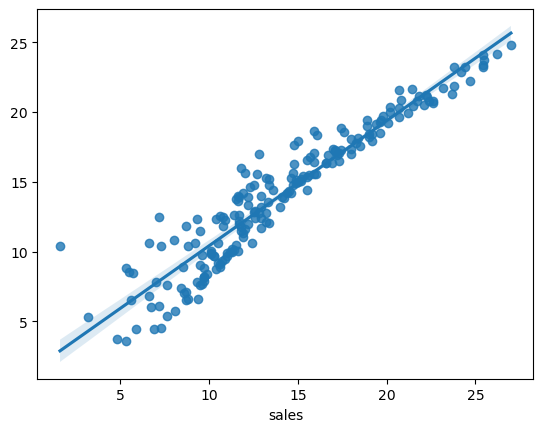

In [33]:
sns.regplot(x=addata.iloc[:,3],y=predictions)
#sns.lmplot(x=addata.iloc[:,3],y=predictions)#require data argument

In [34]:
#using stat model
lmall = smf.ols(formula='sales ~ TV + radio + newspaper', data=addata).fit()
print(lmall.params)
print(lmall.rsquared)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64
0.8972106381789522


In [136]:
#Model Evaluation Metrics for Regression
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
#1/n*(sum(av-pv))
#Mean Squared Error (MSE) is the mean of the squared errors
#1/n*(sum(av-pv)^2
#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:)
#sqrt(1/n*(sum(av-pv)^2)

In [137]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))#MAE
print(metrics.mean_squared_error(y_true, y_pred))#MSE
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))#RMSE


10.0
150.0
12.24744871391589


In [138]:
#Model Evaluation Using Train/Test Split
X = addata[['TV', 'radio', 'newspaper']]
y = addata.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2=LinearRegression()
lm2.fit(X_train,y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))#rmse
lm2.score(X_train,y_train)#r square for al tv radio and news paper

1.4046514230328955


0.890307557755665

In [139]:
# exclude Newspaper
X = addata[['TV', 'radio']]
y = addata.sales
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Instantiate model
lm3 = LinearRegression()
# Fit model
lm3.fit(X_train, y_train)
# Predict
y_pred = lm3.predict(X_test)
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
lm3.score(X_train,y_train)# r square for al tv radio and news paper

1.3879034699382888


0.8901498098117536

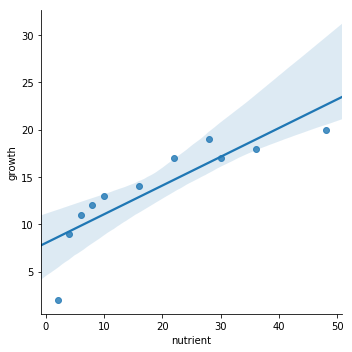

In [140]:
data={'growth':[2,9,11,12,13,14,17,19,17,18,20],'nutrient':[2,4,6,8,10,16,22,28,30,36,48]}
type(data)
newdata=pd.DataFrame(data)
type(newdata)
sns.lmplot(x="nutrient",y="growth",data=newdata)
#sns.lmplot(x="nutrient",y="growth",data=newdata,order=2)
#sns.lmplot(x="nutrient",y="growth",data=newdata,order=3)
#sns.lmplot(x="nutrient",y="growth",data=newdata,order=6)


In [141]:
nlm=LinearRegression()
# xdata=newdata[["nutrient"]] This returns dataframe and 
#xdata=newdata["nutrient"] or newdata.nutrient returns series 
xdata=pd.DataFrame(newdata.nutrient) 
ydata=newdata.growth

In [142]:
nlm.fit(xdata,ydata)
predictions=nlm.predict(xdata)
print(nlm.coef_)
print(nlm.intercept_)
print(nlm.score(xdata,ydata))#r Square value 
print(nlm._residues)#this is residual sum square
print(sum((ydata-predictions)**2))#this is also residual sum square


[0.3034494]
8.025056947608203
0.741235268156159
71.84249918646273
71.84249918646275


In [143]:
#rse=sqrt(RSS/(n-p-1))
rse1=np.sqrt ( nlm._residues/ (len(ydata)-1-1) )#This is RSE
print("RSE=",rse1)
#RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse1=np.sqrt(metrics.mean_squared_error(predictions,ydata))
print("RMSE=",rmse1)
#mean absolute error
mae1=metrics.mean_absolute_error(predictions,ydata)
print("MAE=",mae1)

RSE= 2.825331822920446
RMSE= 2.555608790421263
MAE= 1.9162204538058745


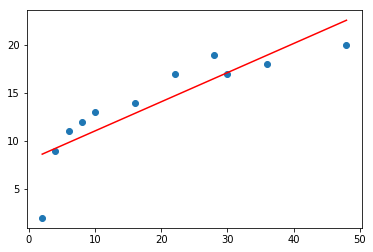

In [144]:
plt.scatter(newdata["nutrient"],newdata["growth"])
plt.plot(newdata["nutrient"], nlm.predict(pd.DataFrame(newdata.nutrient)), color = 'red')
plt.show() 


In [145]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly_x=poly.fit_transform(xdata)
nlm1=LinearRegression()
nlm1.fit(poly_x,ydata)
predictions1=nlm1.predict(poly_x)
print(nlm1.coef_)
print(nlm1.intercept_)
print(nlm1.score(poly_x,ydata))# rSquare

[ 0.          0.74262621 -0.00947959]
5.0217326170995324
0.8664747247875373


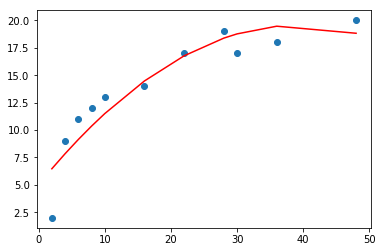

In [146]:
plt.scatter(newdata["nutrient"],newdata["growth"])
plt.plot(newdata["nutrient"], nlm1.predict(poly_x), color = 'red')
plt.show() 

In [147]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
poly_x=poly.fit_transform(xdata)
nlm2=LinearRegression()
nlm2.fit(poly_x,ydata)
predictions1=nlm2.predict(poly_x)
print(nlm2.coef_)
print(nlm2.intercept_)
print(nlm2.score(poly_x,ydata))# rSquare

[ 0.00000000e+00  1.60956020e+00 -5.30236232e-02  5.74438120e-04]
1.5562924432878251
0.9288943743686501


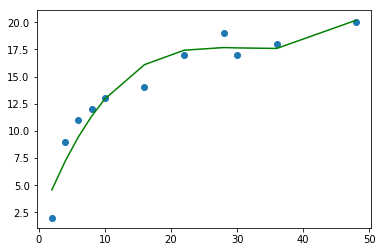

In [148]:
plt.scatter(newdata["nutrient"],newdata["growth"])
plt.plot(newdata["nutrient"], nlm2.predict(poly_x), color = 'green')
plt.show() 